# Text Analysis with NLTK

The [Natural Language Toolkit](http://www.nltk.org/) (NLTK) and is a fully featured library for doing everything from basic text analysis to sophisticated computational linguistics.

NLTK(Natural Language Toolkit)는 기본적인 텍스트 어널리틱스부터 수준높은 컴퓨터 언어학까지 모든 영역을 커버할 수 있는 완전한 기능을 기능을 갖춘 라이브러리다.

We're just scratch the surface here:
우리는 여기서 간단히 알아보자.
- Parsing (구문분석)
- Tokenization (토큰화)
- Stopword removal (스탑워드 제거)
- Frequency counting (반복되는 것 카운팅)
- Stemming (형태소)
- Basic sentiment analysis (기본감정분석)

For more detail and to go deeper in learning about Natural Language Processing a good resources is: [Natural Langauge Processing with Python](http://www.nltk.org/book/). There are also APIs out there that allow you to do quite sophisticated text analysis, for example [AlchemyAPI](http://www.alchemyapi.com/). 

좀 더 상세한 내용을과 자연언어처리에 대한 배움을 더 깊게 하고 싶으면 여기에 좋은 자료들이 많이 있다.
또한, API 가 사용가능하고, 너가 좀더 수준높은 텍스트 분석을 할 수 있도록 API예제들도 있다.


In [1]:
# We're going to use the Natural Language Toolkit here (NLTK) - http://www.nltk.org/
import nltk

Let's first look at some basic text operations using the 2016 State of the Union (SOTU) address. Here's the [sotu_2016.txt](https://www.dropbox.com/s/nume1fwb2g3frpf/sotu_2016.txt?dl=0) file.
자 먼저, 몇가지 기본적인 텍스트 작동을 보자. 여기서는 2016년 유니온 주의 주소를 사용한다. 파일은 "[sotu_2016.txt]"이다.

In [2]:
# Load in transcript file
file = open('sotu_2016.txt', 'r')
transcript = unicode(file.read().decode("utf8"))

# Print it out
print transcript

Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:

Tonight marks the eighth year that I’ve come here to report on the State of the Union. And for this final one, I’m going to try to make it a little shorter. (Applause.) I know some of you are antsy to get back to Iowa. (Laughter.) I've been there. I'll be shaking hands afterwards if you want some tips. (Laughter.)

And I understand that because it’s an election season, expectations for what we will achieve this year are low. But, Mr. Speaker, I appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families. So I hope we can work together this year on some bipartisan priorities like criminal justice reform -- (applause) -- and helping people who are battling prescription drug abuse and heroin abuse. (Applause.) So, who knows, we might surprise the cynics again.

But tonight, I want to go easy on the traditional li

Converting to lowercase text is very easy with the `.lower()` function. 
소문자 텍스트로 '.lower()'함수를 사용해서 매우 쉽게 변경할 수 있다.

Sometimes is makes sense to convert everything because then capitals at the beginning of sentences or in names aren't treated differently. Other functions in the same vein include `.upper()` (converts to upper case) and `.title()` (converts to title case).

때로는 모든것을 변화시킬 수 있다. 왜냐하면, 문장의 시작부 또는 네임에 있는 대문자도 다르지 않게 처리한다. 
같은 맥락에서 다른 함수는 `.upper()`(대문자로 변환), `.title()`(타이틀 케이스로 변환)가 있다.


In [3]:
transcript_lower = transcript.lower()
print transcript_lower

mr. speaker, mr. vice president, members of congress, my fellow americans:

tonight marks the eighth year that i’ve come here to report on the state of the union. and for this final one, i’m going to try to make it a little shorter. (applause.) i know some of you are antsy to get back to iowa. (laughter.) i've been there. i'll be shaking hands afterwards if you want some tips. (laughter.)

and i understand that because it’s an election season, expectations for what we will achieve this year are low. but, mr. speaker, i appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families. so i hope we can work together this year on some bipartisan priorities like criminal justice reform -- (applause) -- and helping people who are battling prescription drug abuse and heroin abuse. (applause.) so, who knows, we might surprise the cynics again.

but tonight, i want to go easy on the traditional li

If you look *really* closely at the output you can see some inconsistencies.
너가 산출물을 정말로 자세히 보면, 불일치를 볼수 있을 것이다.

For instance sometimes it looks like the apostrophe's are angled and other times they're not. 
예로 들어 때때로, 생략부호가 각도가 있고, 그렇지 않은 경우도 있을 것이다.

We want to normalize the text so that it's always using the same version of the apostrophe, as well as quotes and a few other special characters.
우리는 텍스트가 일반화되기를 원한다. 그래서 항상 같은 버젼의 생략부호를 사용할 수 있고 또한, 인용부호와 다른 특별한 캐릭터들도 그렇게 되길 원한다.

In [4]:
table = {
    ord(u'\u2018') : u"'",
    ord(u'\u2019') : u"'",
    ord(u'\u201C') : u'"',
    ord(u'\u201d') : u'"',
    ord(u'\u2026') : u'', 
    ord(u'\u2014') : u'', # get rid of em dashes
}
transcript_lower = transcript_lower.translate(table)
print transcript_lower

mr. speaker, mr. vice president, members of congress, my fellow americans:

tonight marks the eighth year that i've come here to report on the state of the union. and for this final one, i'm going to try to make it a little shorter. (applause.) i know some of you are antsy to get back to iowa. (laughter.) i've been there. i'll be shaking hands afterwards if you want some tips. (laughter.)

and i understand that because it's an election season, expectations for what we will achieve this year are low. but, mr. speaker, i appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families. so i hope we can work together this year on some bipartisan priorities like criminal justice reform -- (applause) -- and helping people who are battling prescription drug abuse and heroin abuse. (applause.) so, who knows, we might surprise the cynics again.

but tonight, i want to go easy on the traditional li

Now we want to strip out all of the punctuation so that we're left with just the words. 
이제, 우리는 모든 구두점을 없애려고 한다. 그래서, 단지 단어들만 남길려고 한다.

In [5]:
import string

def remove_punctuation(text):
    # Grab the list of standard punctuation symbols that are provided in the string library
    punctuations = string.punctuation # includes following characters: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~

    # But don't strip out apostrophes, as we want to preserve possessives and contractions, an alternative would be to expand contractions
    excluded_punctuations = ["'"]
    for p in punctuations:
        if p not in excluded_punctuations:
            # replace each punctuation symbol by a space
            text = text.replace(p, " ") 

    return text

transcript_lower = remove_punctuation(transcript_lower)
print transcript_lower

mr  speaker  mr  vice president  members of congress  my fellow americans 

tonight marks the eighth year that i've come here to report on the state of the union  and for this final one  i'm going to try to make it a little shorter   applause   i know some of you are antsy to get back to iowa   laughter   i've been there  i'll be shaking hands afterwards if you want some tips   laughter  

and i understand that because it's an election season  expectations for what we will achieve this year are low  but  mr  speaker  i appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families  so i hope we can work together this year on some bipartisan priorities like criminal justice reform     applause     and helping people who are battling prescription drug abuse and heroin abuse   applause   so  who knows  we might surprise the cynics again 

but tonight  i want to go easy on the traditional li

In some cases multiple punctuations in a row were removed, resulting in larger gaps of 2 or more spaces. 
경우에 따라서, 여러번 구두점이 행으로 연결된 경우 제거됨 (2가지 이상의 캡인 경우)

We want to condense these down to only a single space which will result in a solid block of text with each word separated by only one space.
우리는 단지 하나의 스페이스로 요약하려고 함. 결과적으로 각 언어들은 하나의 스페이스로 구분됨.

In [6]:
" ".join(transcript_lower.split())

u"mr speaker mr vice president members of congress my fellow americans tonight marks the eighth year that i've come here to report on the state of the union and for this final one i'm going to try to make it a little shorter applause i know some of you are antsy to get back to iowa laughter i've been there i'll be shaking hands afterwards if you want some tips laughter and i understand that because it's an election season expectations for what we will achieve this year are low but mr speaker i appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families so i hope we can work together this year on some bipartisan priorities like criminal justice reform applause and helping people who are battling prescription drug abuse and heroin abuse applause so who knows we might surprise the cynics again but tonight i want to go easy on the traditional list of proposals for the year ahead don't wor

### Tokenization
Tokenization is the process by which we split up a text into individual tokens. 
토큰화는 우리가 텍스트를 개별적인 개별 토큰들로 분할하는 과정이다.

In this case we're interested in words as tokens. 
이와같은 경우, 우리는 토큰과 같은 단어에 관심이 있다.

In other cases we might be interested in tokenizing at the level of paragraphs or sentences.
다른 경우에, 우리는 단락 또는 문장 수준의 토큰화에 관심이 있을 수도 있다.

In [7]:
from nltk.tokenize import WhitespaceTokenizer

# Create a tokenizer from NLTK which will create tokens based on the whitespace in between words
tokenizer = WhitespaceTokenizer()

# Use the tokenizer on the text string for the transcript
transcript_tokens = tokenizer.tokenize(transcript_lower)

# And the output is a python list of tokens (in unicode)
print transcript_tokens

[u'mr', u'speaker', u'mr', u'vice', u'president', u'members', u'of', u'congress', u'my', u'fellow', u'americans', u'tonight', u'marks', u'the', u'eighth', u'year', u'that', u"i've", u'come', u'here', u'to', u'report', u'on', u'the', u'state', u'of', u'the', u'union', u'and', u'for', u'this', u'final', u'one', u"i'm", u'going', u'to', u'try', u'to', u'make', u'it', u'a', u'little', u'shorter', u'applause', u'i', u'know', u'some', u'of', u'you', u'are', u'antsy', u'to', u'get', u'back', u'to', u'iowa', u'laughter', u"i've", u'been', u'there', u"i'll", u'be', u'shaking', u'hands', u'afterwards', u'if', u'you', u'want', u'some', u'tips', u'laughter', u'and', u'i', u'understand', u'that', u'because', u"it's", u'an', u'election', u'season', u'expectations', u'for', u'what', u'we', u'will', u'achieve', u'this', u'year', u'are', u'low', u'but', u'mr', u'speaker', u'i', u'appreciate', u'the', u'constructive', u'approach', u'that', u'you', u'and', u'the', u'other', u'leaders', u'took', u'at', u'

We might wonder how long (i.e. how many tokens) were in the speech. 

우리는 스피치에서 얼마나 많은 토큰이 있는지 궁금하다.

In [8]:
len(transcript_tokens)

6160

Once we have a list of tokens we can have NLTK parse it into a Text object which lets us do some exploratory operations on it, like search it and see concordances (i.e. context around the search term). 
우리가 토큰의 목록을 갖게 되면, 우리는 이것을 몇가지 탐색작업을 할 수 있는 텍스트 개체로 분석을 할 수 있는 NLTK를 가진다, 즉 이것을 검색하고, 유사점을 보는 것과 같다.

In [9]:
text_transcript = nltk.text.Text(transcript_tokens)
text_transcript.concordance("americans")

Displaying 15 of 15 matches:
                                   americans tonight marks the eighth year that
 true and the reason that a lot of americans feel anxious is that the economy h
here are actually some areas where americans broadly agree we agree that real o
 job loss has gotten a lot tougher americans understand that at some point in t
d strengthen them applause and for americans short of retirement basic benefits
o get more students and low income americans online applause we've launched nex
rizona to new york solar is saving americans tens of millions of dollars a year
heir energy bills and employs more americans than coal in jobs that pay better 
ities and put tens of thousands of americans to work building a 21st century tr
 a prison cell when you come after americans we go after you applause and it ma
 or some special interest too many americans feel that way right now it's one o
s i hold this office but my fellow americans this cannot be my task or any pres
 voting rig

Basic visualization options, like a dispersion plot can help understand how different terms are distributed throughout the text.
기존적인 시각화 옵션들은 ,분산플롯처럼, 텍스트를 통해서 얼마나 다른 용어들이 분배되었는지 이해하는 것을 돕는다.

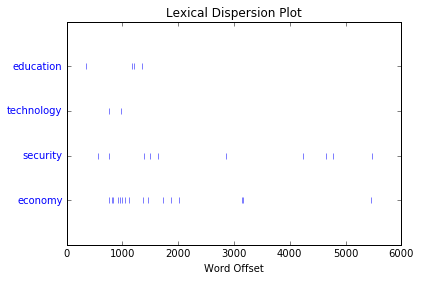

In [10]:
%matplotlib inline

text_transcript.dispersion_plot(["education", "technology", "security", "economy"])

### Stopword Removal
We may also want to remove stopwords, words that are often considered to be so frequent that they don't contain much information. 
우리는 또한 스탑워드 또는 많은 정보를 담지 않고 자주 사용되는 단어들을 없애기를 원한다.

In general you should carefully consider what words are included in your stoplist, but of course there is a default list of terms built into NLTK. 
일반적으로 너는 어떤 단어들이 너의 스탑리스트에 포함되어 있는지를 주의깊게 보아야 한다. 그러나, 물론, NLTK에는 기본적인 탑재된 용어들의 리스트이 있다.


To get that list we first have to initiate the download of the NLTK resources (the next cell should initiate a dialog box where you need to click the "download" button).
리스트를 가지기 위해서는 NLTK 리소스를 먼저 다운로드를 시작을 해야 한다. 


In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
print stopword_list 

To remove the words in the stopword list we can use a [python list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions).

우리가 사용할 수 있는 "python list comprehension"에 스탑워드리스트를 단어들을 제거.

In [ ]:
transcript_tokens = [w for w in transcript_tokens if w not in stopword_list]
print transcript_tokens

In [ ]:
len(transcript_tokens)

### Frequencies

And finally we're ready to count up the frequency of tokens in the text. Below we print just the top 25 most frequent terms. 

결과적으로 우리는 텍스트에 있는 토큰들의 반복을 셀 수 있는 준비가 되었다. 아래에는 우리가 단지 상위 25 가장 자주 사용되는 용어들을 프린트 한것이다.

In [ ]:
from nltk.probability import FreqDist

# Construct the distribution (it will count the number of occurrances of each unique token)
frequency_distribution = FreqDist(transcript_tokens)
frequency_distribution.most_common(25)

We can see that a very common terms is "applause", because the text included a transcription of when the audience applauded during the speech. We might want to remove that term.

우리는 "applause"라는 매우 일반적인 용어를 볼 수 있다. 왜냐면, 이 텍스트는 스피치중에 관객들이 언제 박수를 쳤는지 표기를 포함하고 있다.
우리는 이 용어를 제거하길 원한다.

In [ ]:
del frequency_distribution["applause"]
frequency_distribution.most_common(25)

Can you start to see some of the themes of the speech based on the frequency of different words chosen? 

당신은 몇가지의 다른 단어들을 선택하는 빈도수를 기본으로 스피치를 한 테마를 보는 것을 시작할 수 있나요?

It looks like "work" and the "economy" came up fairly often. Maybe we want to screen the tokens for other economic types terms.

"work"와 "economy"을 얼마나 자주 나오는지와 같다. 우리는 다른 경제적인 종류의 용어들에서 토큰들을 볼수 있기를 원한다.

In [ ]:
econ_terms = ["debt", "economy", "budget", "spending", "tax", "deficit", "work", "working", "workers", "workforce", "companies", "worked", "economics", "businesses", "jobs"]

econ_transcript_tokens = [t for t in transcript_tokens if t in econ_terms]
econ_transcript_freq_dist = FreqDist(econ_transcript_tokens)
econ_transcript_freq_dist

We need a chart! 
우리는 차트가 필요하다.

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# This magic function allows you to see the charts directly within the notebook. 
%matplotlib inline

# This command will make the plots more attractive by adopting the commone style of of a different library called ggplot
matplotlib.style.use("ggplot")

Let's wrangle the data into a format where we can create a Pandas DataFrame and then chart it.

자 데이터를 다음 포맷으로 논쟁하자. 우리는 판다스 데이터프레임으로 만들고, 그것을 차트화 하자.

In [ ]:
# Create a simple list
econ_data = []
for item in econ_transcript_freq_dist:
    econ_data.append([item, econ_transcript_freq_dist[item]])

# Use the list to intitlize a pandas dataframe
econ_df = pd.DataFrame(econ_data, columns=["token", "count"])
econ_df = econ_df.sort_values("count")
econ_df

In [ ]:
axes = econ_df.plot(kind="barh")
axes.set_yticklabels(econ_df["token"])

Individual tokens or unigrams as they're sometimes called aren't the only thing we can tally.
그들이 때때로 개별적인 토근 또는 유니그램이라고 부르는 것은 우리가 집계할 수 있는 유일한 것은 아니다. 

We can also look at pairs of words (bigrams), or more generally, n-grams.
우리는 쌍으로 된 단어들이나 더 일반적으로 n-그램들을 또한 볼수 있다.

In [ ]:
bigrams = nltk.bigrams(transcript_tokens)
bigram_freq_dist = FreqDist(bigrams)
bigram_freq_dist.most_common(25)

### Stemming
The chart above shows that there are are a number of versions of the same basic idea, e.g. "workers", "working", and "worked" that all have the same underlying concept behind them.
위의 차트는 동일한 기본 아이디어의 버젼 번호가 있는지 보여주다. 예로 들면, "workers" "working" "worked"의 모두가 그들 뒤에 동일한 기본 컨셉을 가지고 있다. 

Stemming is a technique that is used remove affixes from a word. 
형태소 분석은 단어에서 부착물을 제거하는 기술이다.

There are different stemming algorithms that can be employed, and several are built in to NLTK. 
이용될 수 있는 여러가지 형태소분석 알고리즘 있고, NLTK에서 몇가지가 이미 만들어져 있다.

We'll use the Porter algorithm. 
우리는 포터 알고리즘을 사용할 것이다.

The advantage of stemming is that it allows for additional aggregation of words that represent a similar concept. 
형태소분석의 장점은 유사한 개념을 나타내는 추가적인 집합 단어들을 허가한다는 것이다.

At the same time, there is a loss of information due to this aggregation, and as you can see below, the stems that are left after the stemming process aren't always easy to read.
동시에, 이와 같은 집합들 때문에 정보손실이 있다 너가 하기에서 보듯이, 형태소 처리가 항상 쉽게 읽게 읽을 수 없는 후에 꼭지가 남았다.


In [ ]:
porter = nltk.PorterStemmer()
econ_transcript_tokens_stemmed = [porter.stem(t) for t in econ_transcript_tokens]
econ_transcript_tokens_stemmed

In [ ]:
econ_transcript_stemmed_freq_dist = FreqDist(econ_transcript_tokens_stemmed)
econ_transcript_stemmed_freq_dist
# Create a simple list
econ_data = []
for item in econ_transcript_stemmed_freq_dist:
    econ_data.append([item, econ_transcript_stemmed_freq_dist[item]])

# Use the list to intitlize a pandas dataframe
econ_df = pd.DataFrame(econ_data, columns=["token", "count"])
econ_df = econ_df.sort_values("count")
axes = econ_df.plot(kind="barh")
axes.set_yticklabels(econ_df["token"])



## Sentiment Analysis
Sentiment analysis is a general term used to describe how text can be analyzed to infer subjective qualities like positivity, negativity, or other types of emotions like happiness, sadness, or anger. 

감정분석은 어떻게 텍스트는 주관적인 품질에 따라서 판단하면서 분석하는 일반적인 용어로 사용되었다. 예로, 긍정, 부정 또는 다른 타입의 강점들 행복, 슬픔 또는 화와 같은 것이다. 

There are many pitfalls to be aware of when you're trying to make something as subjective as human emotion in a quantifiable number. 

너가 사람들의 감정으로 정량화를 주관적으로 만들려고 할 때 인식하는 많은 함정이 있다. 

Simple approaches often do not account for even basic linguistic structures like negations (e.g. "I'm *not* sad today"). 

단순한 접근법들은 종종 심지어 부정과 같은 기본적인 언어구조를 고려하지 않는다.

Take these results with a grain of salt, but also be aware that there often is *some* signal in all of the ambiguous noise of text.


소금의 입자와 같은 결과를 가지고, 텍스트의 모호한 소음의 모든것이 몇 가가지 신호이라는 종종 인식해야 한다. 

We'll look at sentiment analysis by examining a corpus of reviews written on Yelp. 
우리는 옙의 리뷰로 쓰여진 코퍼스를 실험된 감성분석을 볼 수 있을 것이다.

Yelp has an [academic dataset](https://www.yelp.com/academic_dataset) that it makes available. 
엡은 아카데미 데이터셋을 가지고 있으며, 이것은 사용 가능하다.

It includes information on individual reviews, users, and businesses. 
개인 리뷰, 사용자, 비즈니스에 관한 정보가 있다.

From that large dataset we've sampled down to only the reviews that respond to businesses in the state of Maryland, which is a reasonable number. Here is the [yelp_reviews_md.csv](https://www.dropbox.com/s/oc8dx9qp6xk4245/yelp_reviews_md.csv?dl=0) file. 

그 커다란 데이터셋에서 우리는 단지 다음 리뷰와 관련된 부분을 샘플을 한다. 메리랜드 주의 비즈니스와 관련된 것이며, 합리적인 숫자로 구성되어 있다. 
"yelp_reviews_md.csv"


In [ ]:
reviews_df = pd.read_csv("Data/yelp_reviews_md.csv", encoding="utf-8")
reviews_df

In [ ]:
reviews_df.shape

A simple method to pursue sentiment analysis is using various linguistic resources like dictionaries of terms that have been constructed to correspond to various categories of human communication. 
감성분석을 추구하는 단순한 방법은 다양한 언어 리소스사용하는 것이며, 의사소통의 다양한 카테고리를 대응하기 위해 구성된 용어사전 같은 것이다.  

One of most popular linguistic resources for doing this is Linguistic Inquiry and Word Count ([LIWC](http://liwc.wpengine.com/)). 
이 것을 하기 위해서 가장 인기있는 언어리스소중에 하나는 언어 질문과 단어를 세는 것이다.

From that project there are lists of terms that related to sentiment categories like "Positive Emotion", "Negative Emotion", and "Anger" and well as more general types of categories like "Seeing", "Insight", "Health/illness" etc.
해당 프로젝트는 긍정적인 감정과 부정적인 감정 그리고, 화난 감성 카테고리와 같은 용어리스트가 있으며, 또한 일반적인 타입의 카테고리인 보는 것, 통찰력, 건강/질병등이 있다.

Another useful project with many linguistic resources is the [General Inquirer](http://www.wjh.harvard.edu/~inquirer/).
다른 유용한 프로젝트도 언어리소스에 많이 있다. [General Inquirer]

Here we've isolated the term lists from LIWC corresponding to [positive](https://www.dropbox.com/s/bo82rjzhcd4jy6g/positive_terms.txt?dl=0) and [negative](https://www.dropbox.com/s/9ecamxu1jbtwd6n/negative_terms.txt?dl=0) terms in two separate files (linked previously in this sentence). 
여기에서 우리는 LIWC 의 용어중에 단절된 용어리스트인 긍정적인 그리고 부정적인 용어들이 두 가지의 구분된 파일형태로 되어 있다

Note that these term lists have been *stemmed* which means we will also need to stem our input text in order to match it against these dictionaries.

이와 같은 용어 리스트들은 줄기화해햐 하는데 이 의미는 우리는 이와같은 사전들과 맞추기 위해서 입력 텍스트들을 줄기화하해야 합니다.

In [ ]:
positive_terms = []
f = open('Data/positive_terms.txt', "r")
positive_terms = f.read().splitlines()
f.close()

negative_terms = []
f = open('Data/negative_terms.txt', "r")
negative_terms = f.read().splitlines()
f.close()

In [ ]:
print positive_terms
print ""
print negative_terms

The hypothesis that we're going to test with sentiment analysis is that reviews with a higher overall star rating should have less negative sentiment than reviews with a lower overall star rating. 
우리가 감성분석과 함께 테스트하려고 하는 가설은 높은 전체적인 스타 등급의 리뷰들은 낮은 전체적인 스타 등급의 리뷰에 대비해서 좀 더 작은 부정적인 감정을 가져야 한다.

And conversely, reviews with a higher overall star rating should have more positive sentiment than reviews with a lower overall star rating.
반대로, 높은 전체적인 스타 등급의 리뷰들은 낮은 전체적인 스타 등급의 리뷰에 대비해서 좀 더 긍정적인 감정을 가져야 한다.

First we need to measure a positivity and negativity score for each review. 
먼저, 우리는 각 리뷰들로 부터 긍정과 부정의 스코어를 측정할 수 있어야 한다.

To do that we're going to count the rate of use of terms from a review that come from the positive or negative dictionaries, respectively.

우리는 각각의 긍정 또는 부정의 사전들로 부터 리뷰들이 사용되는 용어들의 숫자를 셀 수 있어야 한다.

In [ ]:
# This function will take a string and lowercase it, remove punctuations and spaces, and then tokentize and stem those tokens
def normalize_review_text(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = " ".join(text.split())
    text_tokens = tokenizer.tokenize(text)
    text_tokens = [porter.stem(w) for w in text_tokens if w not in stopword_list]
    return text_tokens

# Apply the function above to the text column
reviews_df["text"] = reviews_df["text"].apply(normalize_review_text)
reviews_df

In [ ]:
def calculate_positivity(text):
    num_tokens = len(text)
    num_positive_tokens = 0
    for t in text:
        if t in positive_terms:
            num_positive_tokens = num_positive_tokens + 1
    # The positivity score is the fraction of tokens that were found in the positive dictionary
    return float(num_positive_tokens) / float(num_tokens)

reviews_df["positivity_score"] = reviews_df["text"].apply(calculate_positivity)

def calculate_negativity(text):
    num_tokens = len(text)
    num_negative_tokens = 0
    for t in text:
        if t in negative_terms:
            num_negative_tokens = num_negative_tokens + 1
    # The positivity score is the fraction of tokens that were found in the positive dictionary
    return float(num_negative_tokens) / float(num_tokens)

reviews_df["negativity_score"] = reviews_df["text"].apply(calculate_negativity)
reviews_df

Based on our hypothesis we should see a positive correlation between `positivity_score` and `stars` and a negative correlation between `negativity_score` and `stars`. Let's see:

In [ ]:
import scipy.stats as sp

pos_score_stars_corr = sp.pearsonr(reviews_df["stars"].values, reviews_df["positivity_score"].values)
pos_score_stars_corr
print "Between the positivity score and the star rating there is a correlation coefficient of %.4f which has a p-value of %.4E " % (pos_score_stars_corr[0], pos_score_stars_corr[1])

print ""

neg_score_stars_corr = sp.pearsonr(reviews_df["stars"].values, reviews_df["negativity_score"].values)
neg_score_stars_corr
print "Between the negativity score and the star rating there is a correlation coefficient of %.4f which has a p-value of %.4E " % (neg_score_stars_corr[0], neg_score_stars_corr[1])

Based on our (albeit very simple) sentiment analysis we've shown that the sentiments we've computed relate to the actual star ratings of reviews quite well - more positive reviews have higher star ratings, more negative reviews have lower star ratings.  

우리의 감정분석을 기본으로 하여서 우리는 우리가 계산한 감정들을 보여준다. 실제적인 스타 등급 리뷰들은 매우 잘 되었으며, 높은 스타 등급은 좀 더 긍정적인 리뷰를 가지며, 낮은 스타 등급의 좀 부정적인 리뷰를 가진다. 

How could we use this in an investigation? 
우리는 어떻게 이것은 수사에 사용할 수 있을까?